In [1]:
import argparse
from dataclasses import dataclass

import torch
from models.Shapelet import ShapeBottleneckModel

from data_provider.data_loader import UEAloader

import matplotlib.pyplot as plt

In [3]:
@dataclass
class Config:
    epsilon: float = 1.0
    distance_func: str = 'euclidean'
    memory_efficient: bool = True
    seq_len: int = 50
    enc_in: int = 28
    num_class: int = 2
    pool: str = 'max'
    sbm_cls: str = 'linear'
    dropout: float = 0.0
    lambda_div: float = 0.1
    lambda_reg: float = 0.1

In [6]:
root_path = '/media/ssd-3t/amiftakhova/bimai/SelfRegulationSCP2'
data = UEAloader(root_path, flag="TRAIN")

200


In [7]:
data[0][0].shape

torch.Size([1152, 7])

In [8]:
s_freq = 256
r = [0.05, 0.1, 0.2, 0.5, 0.8, 1.0, 2.0, 3.0]

In [9]:
[int(s_freq * r[i]) for i in range(len(r))]

[12, 25, 51, 128, 204, 256, 512, 768]

In [13]:
config = Config()

path_large = 'checkpoints/SBM/FingerMovements/dnn-FCN_seed-0_k-10_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'
path_small = 'checkpoints/SBM/FingerMovements/dnn-FCN_seed-0_k-7_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'

model_small = ShapeBottleneckModel(num_shapelet=[7, 7, 7, 7, 7, 7], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_small.load_state_dict(torch.load(f"{path_small}/checkpoint.pth"))
                            
model_large =  ShapeBottleneckModel(num_shapelet=[10, 10, 10, 10, 10, 10], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_large.load_state_dict(torch.load(f"{path_large}/checkpoint.pth"))

<All keys matched successfully>

In [23]:
data[0][0].T.unsqueeze(0).shape

torch.Size([1, 28, 50])

In [16]:
model_small

ShapeBottleneckModel(
  (shapelets): ModuleList(
    (0-5): 6 x Shapelet()
  )
  (output_layer): Linear(in_features=1176, out_features=2, bias=False)
  (dropout): Dropout(p=0.0, inplace=False)
  (distance_func): PairwiseDistance()
)

In [29]:
model_small.shapelets[0](data[0][0].T.unsqueeze(0))[0].shape

torch.Size([1, 9408])

In [5]:
model_small.shapelets[5].weights.shape

torch.Size([7, 28, 40])

In [6]:
def calc_euclidean_distance(x, y):
    return torch.sqrt(torch.sum((x - y) ** 2, dim=-1))

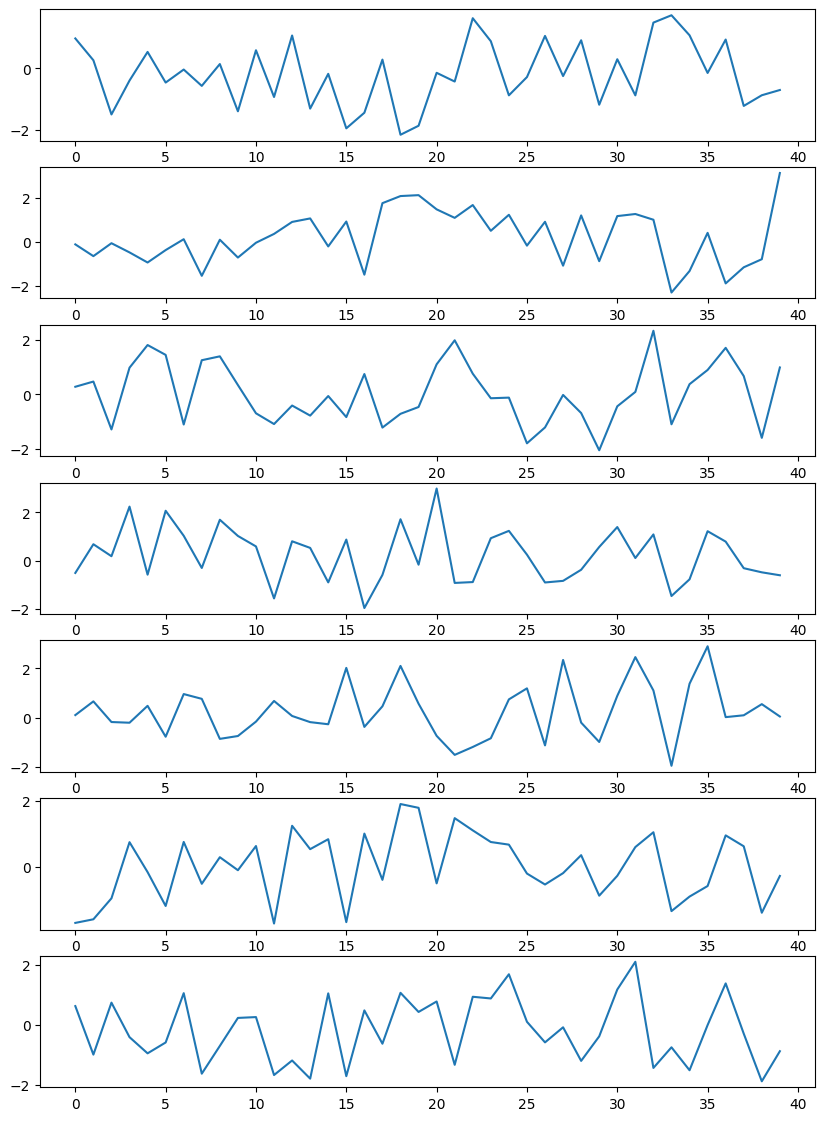

In [8]:
fig, axs = plt.subplots(7, 1, figsize=(10, 2 * 7))
for i in range(7):
    axs[i].plot(range(40), model_small.shapelets[5].weights[i, 0].detach().numpy())
plt.show()

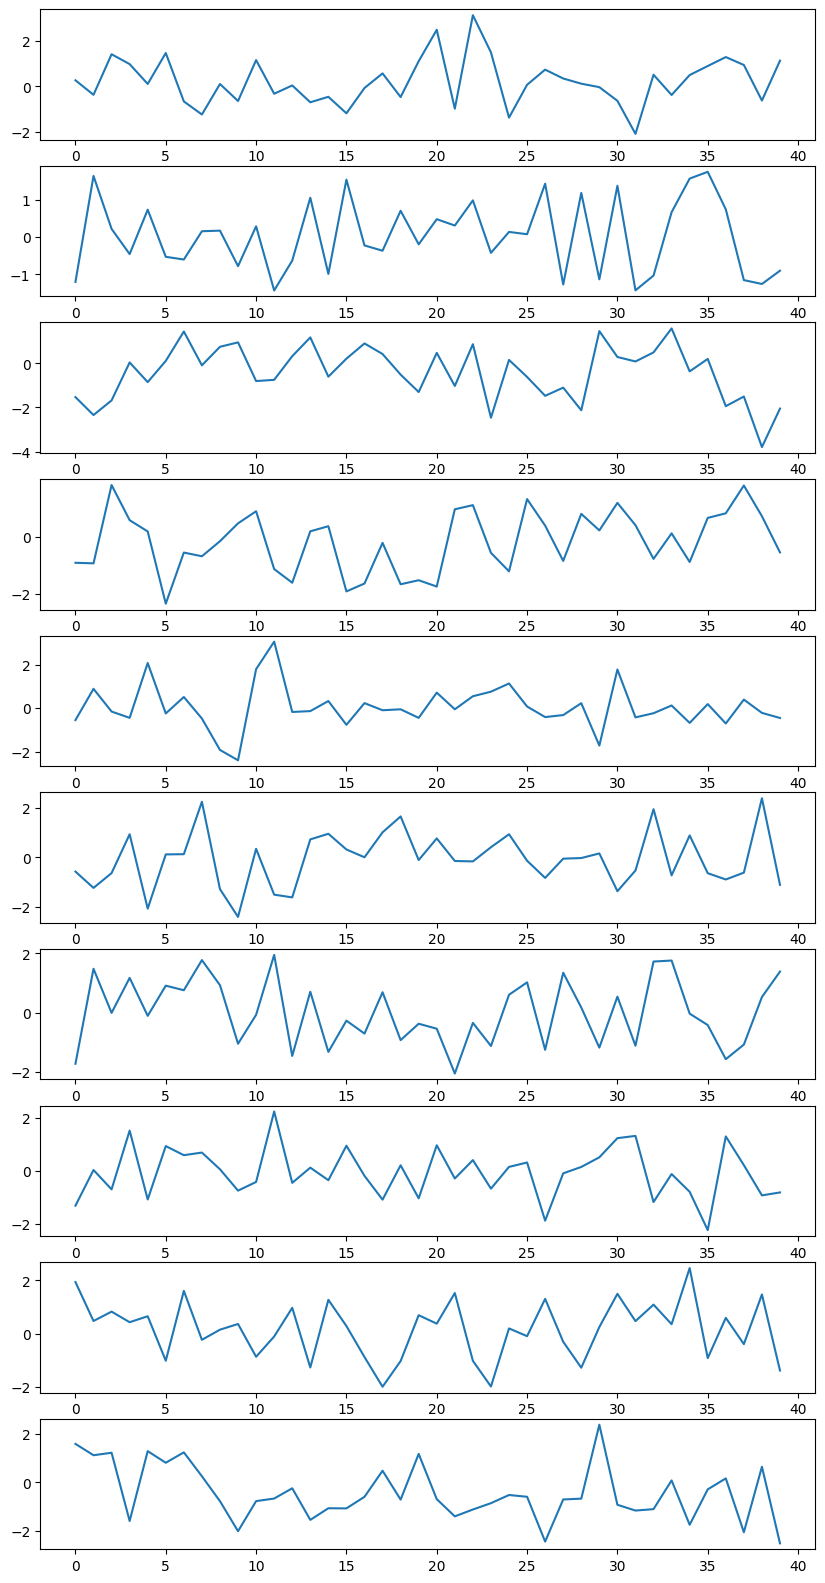

In [9]:
fig, axs = plt.subplots(10, 1, figsize=(10, 20))
for i in range(10):
    axs[i].plot(range(40), model_large.shapelets[5].weights[i, 0].detach().numpy())
plt.show()